## Business Understanding
### Objective: Build an NLP model that predicts the sentiment (positive, negative, or neutral) of Tweets about Apple and Google products.

### Key Questions
- What is the distribution of sentiments in the dataset?
- How do Apple and Google product-related Tweets differ in sentiment?
- Can we improve customer understanding of the product sentiment trends?

## Data Description
Dataset Overview:
The dataset contains over 9,000 Tweets with human-rated sentiment labels (positive, negative, or neutral).


In [84]:
# importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

## Data Understanding

In [85]:
# Loading the dataset

text_df = pd.read_csv('../data_file/tweet_sentiments.csv', encoding='ISO-8859-1')


In [86]:
# Preview the dataset
text_df.head(10)


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


- The DataFrame contains 3 columns, one that bears the tweet, the product, and the sentiment named tweet_text, emotion_in_tweet_is_directed_at, and is_there_an_emotion_directed_at_a_brand_or_product respectively

In [87]:
# renaming the columns to shorter titles
text_df = text_df.rename(columns={
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product':'sentiment',
    'tweet_text':'tweets'
    })


In [88]:
#Checking basic info on dataset
text_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweets     9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


- The DataFrame has 9093 entries, and 3 columns all which are of the 'Object' datatype. 2 of the columns, product and tweets have missing values

In [89]:
# Checking for the number of missing values
text_df.isnull().sum()


tweets          1
product      5802
sentiment       0
dtype: int64

- The tweets column has 1 missing value while the product column has 5802.

In [90]:
# Checking the distribution of sentiments
text_df['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

- Most tweets (5,389) do not express any emotion toward a brand or product, while 2,978 tweets convey positive emotion, and 570 express negative emotion. A smaller number of tweets (156) were unclear or ambiguous in sentiment

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

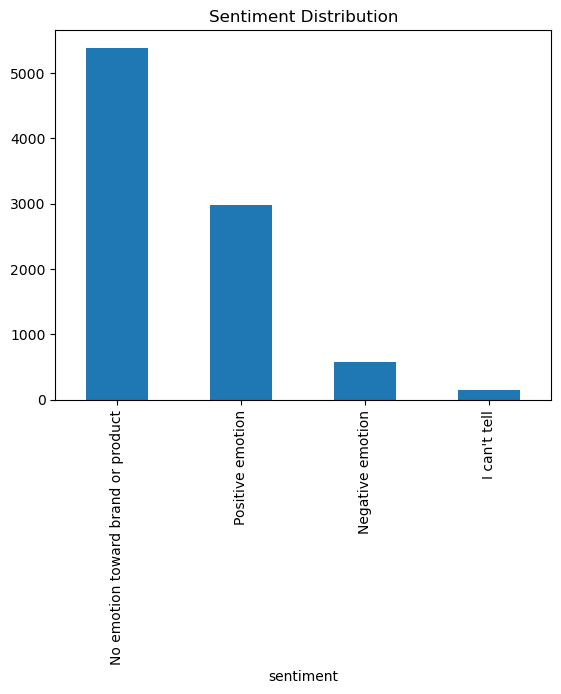

In [91]:
# plotting the distribution of sentiment classes
text_df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')

## Data Preparation

#### I will utilize this section to;
- Remove any duplicates.
- Handle missing values.
- Normalize text (convert to lowercase, remove URLs, mentions (@), hashtags (#), numbers, special characters, etc.
- Remove stopwords which don't add significant value for sentiment analysis).
- Apply tokenization and lemmatization.


In [92]:
# checking for duplicates

text_df.duplicated().value_counts()

False    9071
True       22
Name: count, dtype: int64

-  There are 22 duplicated rows (True), while the vast majority of the data (9,071 rows) are unique (False). I will drop the duplicates

In [93]:
# dropping the duplicates
text_df =text_df.drop_duplicates()
text_df.duplicated().value_counts()

False    9071
Name: count, dtype: int64

In [94]:
# Handling Missing Values
text_df = text_df.dropna(subset=['tweets']) # Drop the 1 missing value in tweets column
text_df = text_df['product'].fillna('not specified') #impute the missing values in product column with 'not specified'

text_df.isna().sum()

0

#### Text Normalization

In [ ]:
import re
import string

# Define a function to clean tweets
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#','', text)
    
    # Remove special characters and numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    text = text.lower()
    
    return text

# Apply cleaning to tweet text
df['cleaned_tweet'] = df['tweet'].apply(clean_text)
